## 8. Feature Selection in the Diabetes Dataset
   - Task: Use techniques like correlation analysis, mutual information, and recursive feature elimination (RFE) to select important features in the Diabetes dataset.
   - Dataset: Diabetes Dataset


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif



df = pd.read_csv('/kaggle/input/diabetes-dataset-for-beginners/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Correlation Analysis

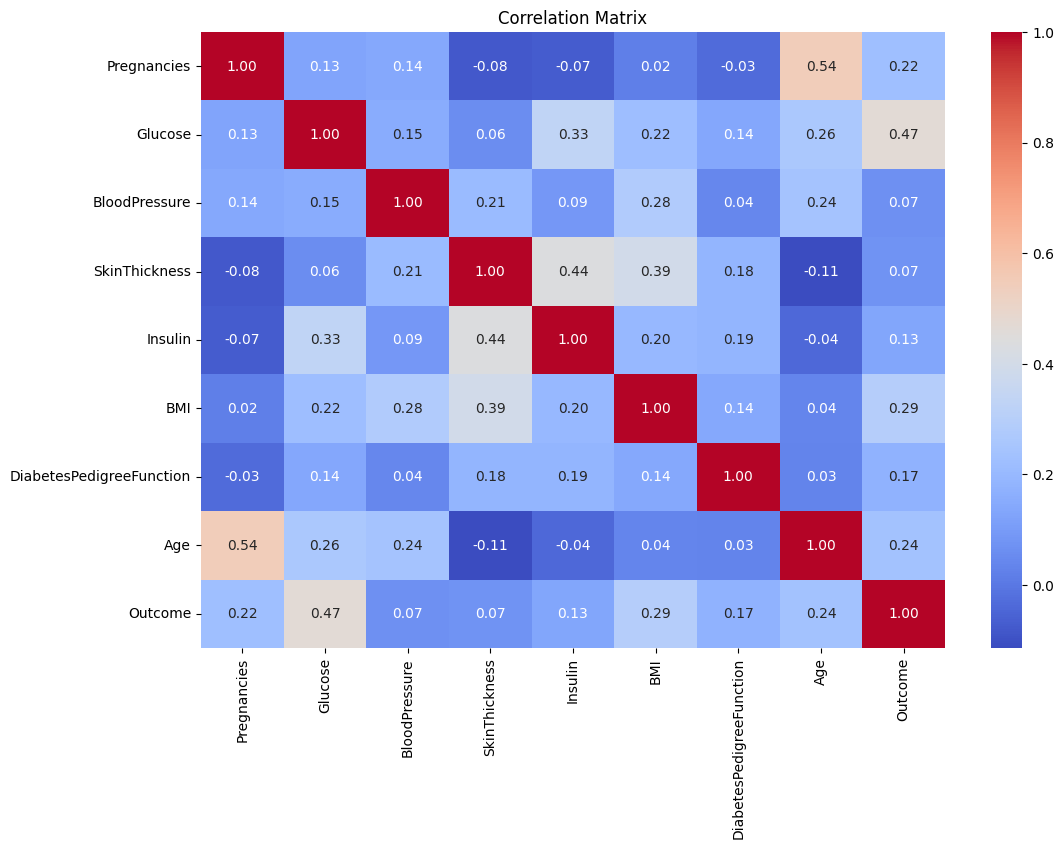

['Pregnancies', 'Glucose', 'BMI', 'Age']

In [9]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Select highly correlated features with the target variable
correlation_threshold = 0.2
target_corr = corr_matrix['Outcome'].abs()
selected_features_corr = target_corr[target_corr > correlation_threshold].index.tolist()
selected_features_corr.remove('Outcome')
selected_features_corr


## Mutual Information

In [10]:
# Compute mutual information
X = df.drop('Outcome', axis=1)
y = df['Outcome']
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame to display the results
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mi_df.sort_values(by='Mutual Information', ascending=False, inplace=True)
mi_df

# Select features with the highest mutual information
mi_threshold = 0.05
selected_features_mi = mi_df[mi_df['Mutual Information'] > mi_threshold]['Feature'].tolist()
selected_features_mi


['Glucose', 'BMI', 'Age']

## Recursive Feature Elimination (RFE)

In [11]:
# Define the model
model = LogisticRegression(max_iter=1000)

# Perform RFE
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

# Get the selected features
selected_features_rfe = X.columns[rfe.support_].tolist()
selected_features_rfe


['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [12]:
# Combine selected features from all methods
selected_features = list(set(selected_features_corr) | set(selected_features_mi) | set(selected_features_rfe))
selected_features


['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']